#### 1. Introdução e Configuração
Este notebook propõe uma análise exploratória (EDA) focada em métricas quantitativas de filmes bem avaliados (Top Rated) extraídos do TMDb. Investigarei a distribuição de notas, popularidade e volume de lançamentos ao longo de mais de um século.

``Objetivos desta etapa:``

Importar bibliotecas essenciais para:
- Manipulação de dados;
- Visualização
  
Carregar o dataset e inspecionar sua estrutura bruta (tipos de dados, valores ausentes e estatísticas iniciais).

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações globais de estilo
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
import warnings
warnings.filterwarnings('ignore')

# Carregar os dados
df = pd.read_csv(r"C:\Users\victor.neves\OneDrive - Softplan\Área de Trabalho\V\Python\Projetos\movies\top_rated_movies.csv")

# Inspeção inicial detalhada
print("--- Amostra dos Dados ---")
display(df.head())

print("\n--- Informações Estruturais ---")
print(df.info())

print("\n--- Estatísticas Descritivas ---")
display(df.describe())

print("\n--- Valores Nulos ---")
print(df.isnull().sum())

--- Amostra dos Dados ---


,Unnamed: 0,id,title,overview,release_date,popularity,vote_average,vote_count
0,0,278,The Shawshank Redemption,Imprisoned in the 1940s for the double murder ...,1994-09-23,32.2333,8.715,29566
1,1,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",1972-03-14,33.8438,8.686,22328
2,2,240,The Godfather Part II,In the continuing saga of the Corleone crime f...,1974-12-20,19.5095,8.570,13501
3,3,424,Schindler's List,The true story of how businessman Oskar Schind...,1993-12-15,14.6770,8.600,17015
4,4,389,12 Angry Men,The defense and the prosecution have rested an...,1957-04-10,12.9954,8.600,9676



--- Informações Estruturais ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18520 entries, 0 to 18519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18520 non-null  int64  
 1   id            18520 non-null  int64  
 2   title         18520 non-null  object 
 3   overview      18518 non-null  object 
 4   release_date  18516 non-null  object 
 5   popularity    18520 non-null  float64
 6   vote_average  18520 non-null  float64
 7   vote_count    18520 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 1.1+ MB
None

--- Estatísticas Descritivas ---


,Unnamed: 0,id,popularity,vote_average,vote_count
count,18520.000000,1.852000e+04,18520.000000,18520.000000,18520.000000
mean,9259.500000,2.239016e+05,4.216869,6.802412,2148.693143
std,5346.407828,2.980745e+05,8.833169,0.623615,3402.029522
min,0.000000,2.000000e+00,0.003100,5.400000,300.000000
25%,4629.750000,1.020700e+04,1.818400,6.319750,480.000000
50%,9259.500000,3.910800e+04,2.907100,6.781500,893.000000
75%,13889.250000,4.036050e+05,4.888125,7.254000,2168.250000
max,18519.000000,1.472638e+06,567.760800,8.715000,38665.000000



--- Valores Nulos ---
Unnamed: 0      0
id              0
title           0
overview        2
release_date    4
popularity      0
vote_average    0
vote_count      0
dtype: int64


#### 2. Limpeza de Dados e Engenharia de Atributos
Com base na inspeção inicial, realizei os seguintes tratamentos:

1. Remoção de Colunas: A coluna Unnamed: 0 é um artefato de índice e será descartada.
2. Tratamento de Nulos: Como a análise temporal é crucial, removeremos as 4 linhas que não possuem release_date.
3. Conversão de Tipos: Transformação da coluna de data para o formato datetime.
4. Criação de Variáveis (Feature Engineering): Extração do Ano e da Década de lançamento para permitir agregações temporais macroscópicas.

In [13]:
# 1. Remover coluna desnecessária
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

# 2. Remover linhas com data de lançamento nula
df = df.dropna(subset=['release_date'])

# 3. Converter para datetime
df['release_date'] = pd.to_datetime(df['release_date'])

# 4. Engenharia de Atributos: Criar Ano e Década
df['release_year'] = df['release_date'].dt.year
df['release_decade'] = (df['release_year'] // 10) * 10

# Verificação pós-processamento
print("--- Novo Shape do Dataset ---")
print(f"Linhas: {df.shape[0]}, Colunas: {df.shape[1]}")

print("\n--- Amostra das Novas Colunas ---")
display(df[['title', 'release_date', 'release_year', 'release_decade']].head())

print("\n--- Verificação de Tipos ---")
print(df.dtypes)

--- Novo Shape do Dataset ---
Linhas: 18516, Colunas: 9

--- Amostra das Novas Colunas ---


,title,release_date,release_year,release_decade
0,The Shawshank Redemption,1994-09-23,1994,1990
1,The Godfather,1972-03-14,1972,1970
2,The Godfather Part II,1974-12-20,1974,1970
3,Schindler's List,1993-12-15,1993,1990
4,12 Angry Men,1957-04-10,1957,1950



--- Verificação de Tipos ---
id                         int64
title                     object
overview                  object
release_date      datetime64[ns]
popularity               float64
vote_average             float64
vote_count                 int64
release_year               int32
release_decade             int32
dtype: object


#### 3. Análise Univariada: Distribuição de Métricas
Nesta etapa, foi análisado visualmente como os dados de Nota Média (vote_average) e Popularidade (popularity) estão distribuídos.

``Objetivos:``

1. Verificar a normalidade das notas (a maioria dos filmes se concentra em torno da média?).  
2. Investigar a assimetria da popularidade (existem "super hits" que distorcem a escala?).  
3. Utilizado escala logarítmica para visualizar melhor dados muito dispersos.  

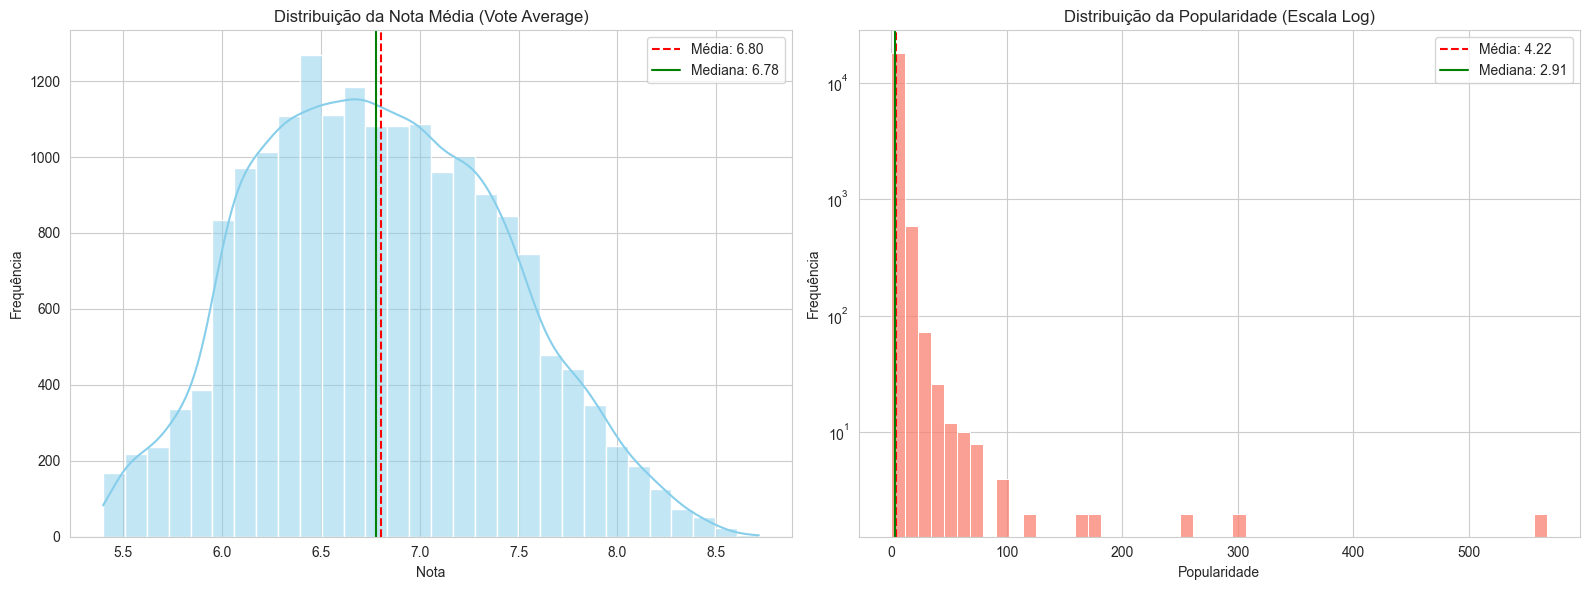


--- Entre -0.5 e +0.5 → considerado simétrico, valor maior que 0.5 cauda longa a direita, e menor que 0.5 cauda longa a esquerda ---
Assimetria (Skewness) das Notas: 0.18
Assimetria (Skewness) da Popularidade: 37.35


In [23]:
# Configurar a área de plotagem (2 gráficos lado a lado)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Distribuição das Notas (Histograma + KDE)
sns.histplot(data=df, x='vote_average', bins=30, kde=True, color='skyblue', ax=ax[0])
ax[0].set_title('Distribuição da Nota Média (Vote Average)')
ax[0].set_xlabel('Nota')
ax[0].set_ylabel('Frequência')

# Adicionar linhas verticais para Média e Mediana nas Notas
ax[0].axvline(df['vote_average'].mean(), color='red', linestyle='--', label=f"Média: {df['vote_average'].mean():.2f}")
ax[0].axvline(df['vote_average'].median(), color='green', linestyle='-', label=f"Mediana: {df['vote_average'].median():.2f}")
ax[0].legend()

# Gráfico 2: Distribuição da Popularidade (Log Scale)
# log scale porque a popularidade tem outliers extremos (cauda longa)
sns.histplot(data=df, x='popularity', bins=50, kde=False, color='salmon', ax=ax[1])
ax[1].set_title('Distribuição da Popularidade (Escala Log)')
ax[1].set_xlabel('Popularidade')
ax[1].set_ylabel('Frequência')
ax[1].set_yscale('log') # Aplicando escala logarítmica no eixo Y para ver melhor os extremos

# Adicionar linhas verticais para Média e Mediana nas Notas
ax[1].axvline(df['popularity'].mean(), color='red', linestyle='--', label=f"Média: {df['popularity'].mean():.2f}")
ax[1].axvline(df['popularity'].median(), color='green', linestyle='-', label=f"Mediana: {df['popularity'].median():.2f}")
ax[1].legend()

plt.tight_layout()
plt.show()

# Cálculos de Assimetria (Skewness) para confirmar a visualização quantitativamente
print("\n--- Entre -0.5 e +0.5 → considerado simétrico, valor maior que 0.5 cauda longa a direita, e menor que 0.5 cauda longa a esquerda ---")
print(f"Assimetria (Skewness) das Notas: {df['vote_average'].skew():.2f}")
print(f"Assimetria (Skewness) da Popularidade: {df['popularity'].skew():.2f}")

#### 4. Análise Bivariada e Correlações
Com base na análise univariada, identificamos que a Popularidade possui uma assimetria extrema (Skewness > 37), enquanto a Nota Média é normalizada.

Nesta etapa, investigaremos as relações entre as variáveis quantitativas para responder:

1. Matriz de Correlação: Qual a intensidade da relação linear entre Popularidade, Votos e Notas?
2. Dispersão (Scatter Plots): Visualizar se filmes com mais votos (vote_count) realmente possuem notas maiores (vote_average), indicando um "efeito de consenso".
3. Popularidade vs. Qualidade: Utilizaremos escala logarítmica para verificar se a popularidade se traduz em qualidade.

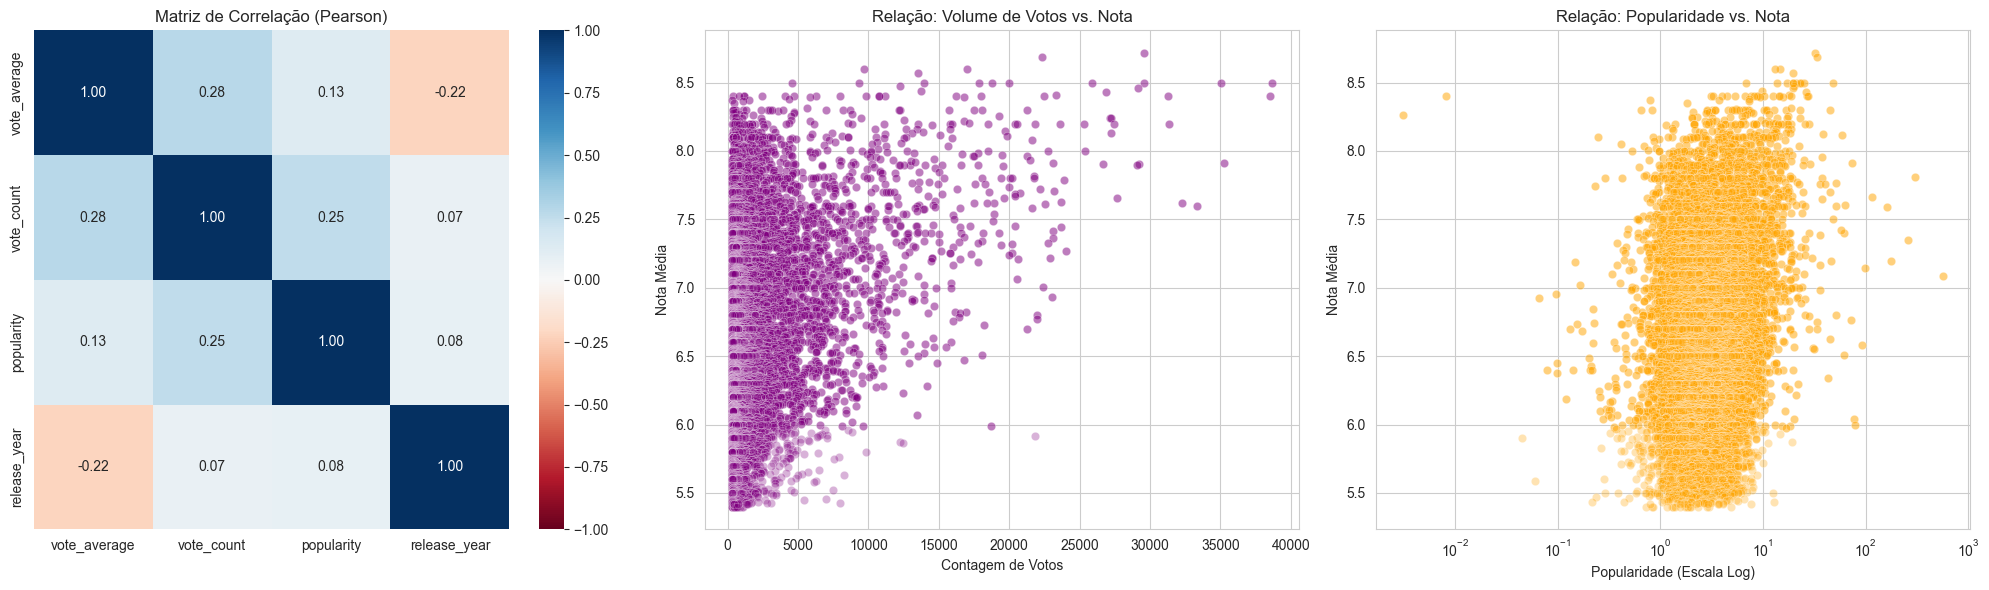

Correlação entre Votos e Nota: 0.2777


In [30]:
# Configuração da figura com 3 subplots
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

# 1. Matriz de Correlação (Heatmap)
# Focamos nas variáveis numéricas principais
cols = ['vote_average', 'vote_count', 'popularity', 'release_year']
corr = df[cols].corr()

sns.heatmap(corr, annot=True, cmap='RdBu', vmin=-1, vmax=1, fmt=".2f", ax=ax[0])
ax[0].set_title('Matriz de Correlação (Pearson)')

# 2. Scatter Plot: Votos vs Nota Média
# Usamos alpha=0.3 para visualizar a densidade dos 18k pontos
sns.scatterplot(data=df, x='vote_count', y='vote_average', alpha=0.3, color='purple', ax=ax[1])
ax[1].set_title('Relação: Volume de Votos vs. Nota')
ax[1].set_xlabel('Contagem de Votos')
ax[1].set_ylabel('Nota Média')

# 3. Scatter Plot: Popularidade vs Nota Média (Escala Log)
sns.scatterplot(data=df, x='popularity', y='vote_average', alpha=0.3, color='orange', ax=ax[2])
ax[2].set_title('Relação: Popularidade vs. Nota')
ax[2].set_xlabel('Popularidade (Escala Log)')
ax[2].set_ylabel('Nota Média')
ax[2].set_xscale('log') # Essencial devido ao skewness de 37.35

plt.tight_layout()
plt.show()

# Exibir a correlação específica entre Votos e Nota para análise textual
print(f"Correlação entre Votos e Nota: {corr.loc['vote_count', 'vote_average']:.4f}")

#### 5. Análise Temporal: A Evolução do Cinema
Já que a popularidade (votos) tem uma correlação fraca (0.27) com a nota, investigaremos se o ano de lançamento influencia a percepção de qualidade.

Hipótese da Sobrevivência: Filmes antigos que permanecem no topo ("Top Rated") tendem a ter notas mais altas porque apenas os clássicos inquestionáveis sobrevivem ao teste do tempo, enquanto o volume de filmes recentes inclui muitas obras medianas ("recency bias").

``Objetivos:``

1. Visualizar a quantidade de filmes lançados por ano no dataset.
2. Comparar a média de notas ao longo das décadas.

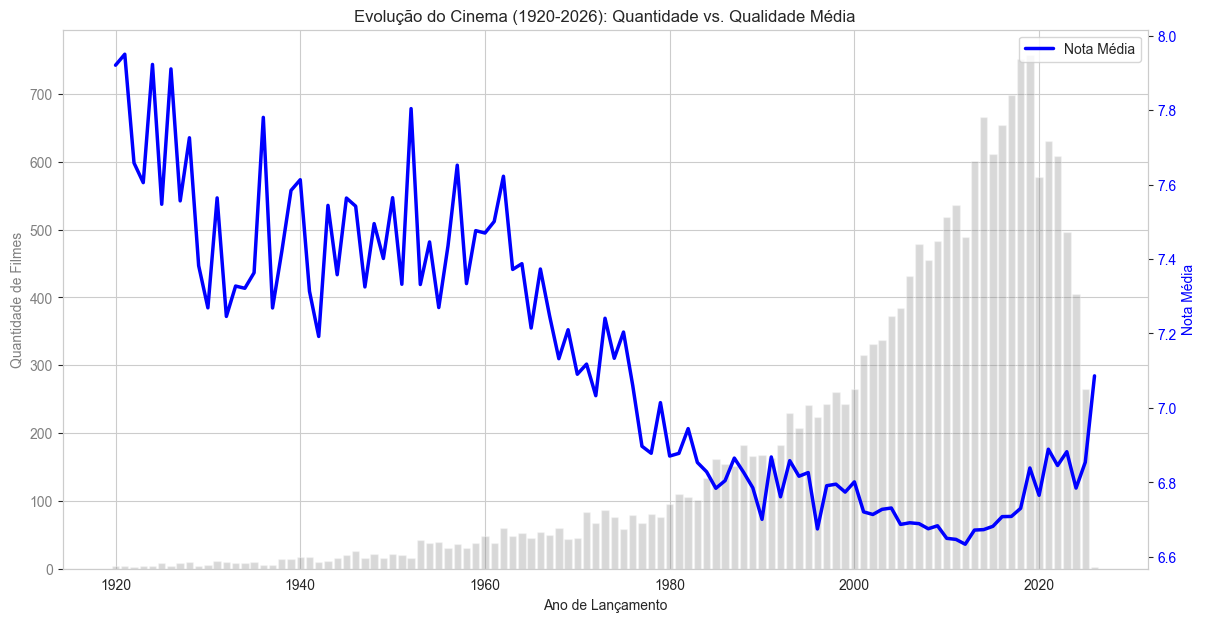

Média de Notas - Era Clássica (1950-1980): 7.24
Média de Notas - Era Moderna (2000-Presente): 6.73


In [31]:
# Agrupar dados por ano
yearly_stats = df.groupby('release_year').agg({
    'vote_average': 'mean',
    'id': 'count'
}).rename(columns={'id': 'filmes_count'})

# Filtrar para começar de 1920 (para evitar ruído dos anos muito iniciais do cinema)
yearly_stats = yearly_stats[yearly_stats.index >= 1920]

# Configurar o gráfico de eixo duplo
fig, ax1 = plt.subplots(figsize=(14, 7))

# Eixo 1: Barras de Quantidade de Filmes (Cinza)
color_bar = 'gray'
ax1.set_xlabel('Ano de Lançamento')
ax1.set_ylabel('Quantidade de Filmes', color=color_bar)
ax1.bar(yearly_stats.index, yearly_stats['filmes_count'], color=color_bar, alpha=0.3, label='Quantidade')
ax1.tick_params(axis='y', labelcolor=color_bar)

# Eixo 2: Linha de Nota Média (Azul)
ax2 = ax1.twinx()  # Cria um segundo eixo Y compartilhando o mesmo X
color_line = 'blue'
ax2.set_ylabel('Nota Média', color=color_line)
sns.lineplot(data=yearly_stats, x=yearly_stats.index, y='vote_average', color=color_line, lw=2.5, ax=ax2, label='Nota Média')
ax2.tick_params(axis='y', labelcolor=color_line)

# Título e Legenda
plt.title('Evolução do Cinema (1920-2026): Quantidade vs. Qualidade Média')
plt.grid(False) # Remover grid do eixo secundário para limpar o visual
plt.show()

# Comparação Direta: Era Clássica vs. Era Moderna
classic_avg = df[(df['release_year'] >= 1950) & (df['release_year'] < 1980)]['vote_average'].mean()
modern_avg = df[df['release_year'] >= 2000]['vote_average'].mean()

print(f"Média de Notas - Era Clássica (1950-1980): {classic_avg:.2f}")
print(f"Média de Notas - Era Moderna (2000-Presente): {modern_avg:.2f}")

#### 6. Conclusão e Insights Finais
Através desta análise quantitativa exploratória (EDA), naveguei por mais de um século de dados cinematográficos do TMDb. Nossos principais achados baseados nos dados processados foram:

1. Popularidade Desigual (Cauda Longa): A métrica de popularidade possui uma assimetria extrema (Skewness > 37). A grande maioria dos filmes tem baixa visibilidade, enquanto uma minoria de blockbusters domina a atenção do público.
2. Qualidade vs. Hype: A correlação entre contagem de votos e nota média é positiva, mas fraca (~0.27). Isso prova que popularidade não é sinônimo de qualidade; o "efeito manada" existe, mas não garante notas altas.
3. A "Era de Ouro" dos Clássicos: A análise temporal revelou uma discrepância significativa na qualidade percebida. Filmes da Era Clássica (1950-1980) possuem uma média de avaliação de 7.24, substancialmente superior à da Era Moderna (2000-Presente), que fica em 6.73. Isso evidencia o Viés de Sobrevivência: apenas as obras-primas do passado continuam sendo assistidas e avaliadas hoje, inflando a média histórica, enquanto o presente possui uma diluição maior de qualidade.

Próximos Passos Sugeridos:

- Análise de Gêneros: Quais gêneros (Terror, Drama, Sci-Fi) envelhecem melhor?
- Processamento de Linguagem Natural (NLP) nas sinopses para correlacionar temas com notas altas.

In [32]:
# Salvar o dataset processado com as novas colunas (Ano, Década) para uso futuro
df.to_csv('top_rated_movies_eda_processed.csv', index=False)

print("Análise concluída com sucesso.")
print(f"Dataset processado contendo {len(df)} filmes salvo como: 'top_rated_movies_eda_processed.csv'")

Análise concluída com sucesso.
Dataset processado contendo 18516 filmes salvo como: 'top_rated_movies_eda_processed.csv'
